In [1]:
import ROOT

Welcome to JupyROOT 6.22/06


In [2]:
from array import array
import copy

In [3]:
# configure ROOT's behavior
ROOT.gROOT.SetBatch()
ROOT.gStyle.SetOptStat("nemruoi")
ROOT.gStyle.SetPadTickX(1) # to get the tick marks on the opposite side of the frame
ROOT.gStyle.SetPadTickY(1) # to get the tick marks on the opposite side of the frame
ROOT.gROOT.ForceStyle()

# open input file
fIn = ROOT.TFile("cluster_histograms.root", "READ")

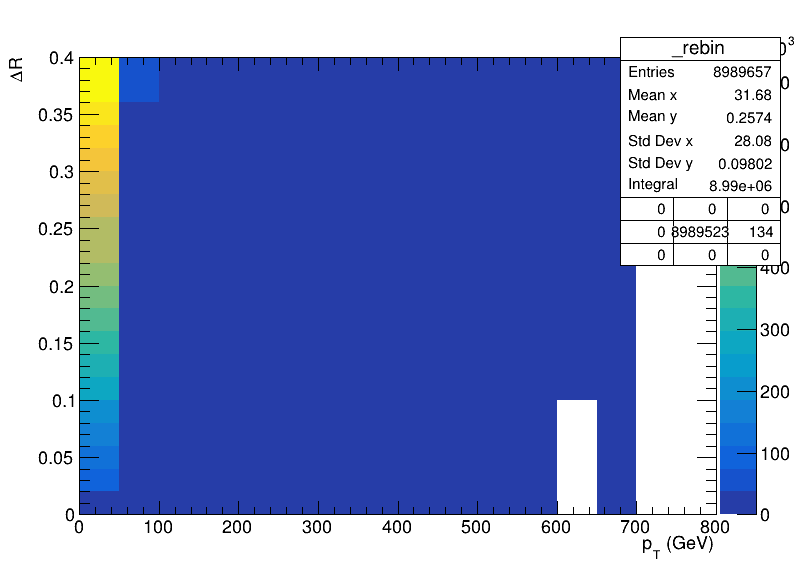

In [4]:
#2D
h2_Cluster_dR_vs_jetpt_FPixD3= fIn.Get("h2_Cluster_dR_vs_jetpt_FPixD3")
h2_Cluster_dR_vs_jetpt_FPixD3_merged= fIn.Get("h2_Cluster_dR_vs_jetpt_FPixD3_merged")

c1=ROOT.TCanvas("c1","The Canvas Title",800,600)

h2_Cluster_dR_vs_jetpt_FPixD3_R=h2_Cluster_dR_vs_jetpt_FPixD3.Rebin2D(50,2,"_rebin")


#h2_Cluster_dR_vs_jetpt_FPixD1.Draw()
h2_Cluster_dR_vs_jetpt_FPixD3_R.Draw("colz")
c1.Draw()

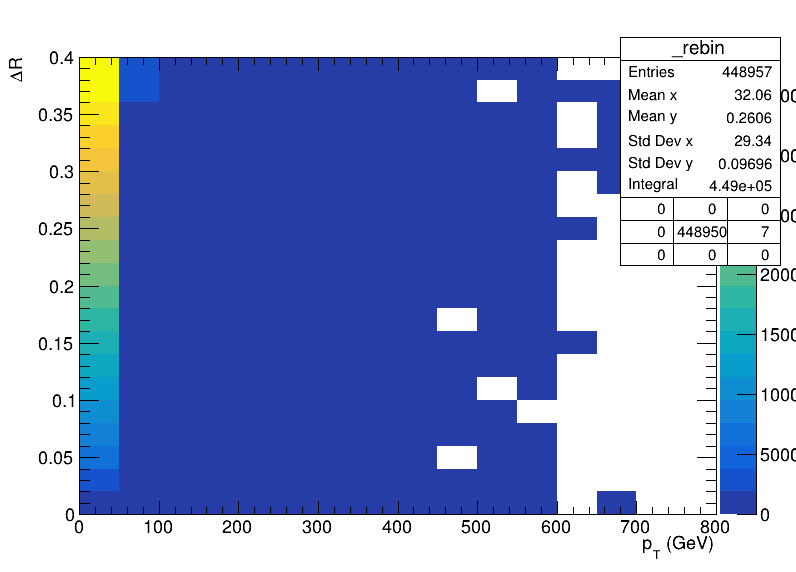

In [5]:
c2=ROOT.TCanvas("c2","The Canvas Title",800,600)

h2_Cluster_dR_vs_jetpt_FPixD3_merged_R=h2_Cluster_dR_vs_jetpt_FPixD3_merged.Rebin2D(50,2,"_rebin")


#h2_Cluster_dR_vs_jetpt_FPixD1.Draw()
c2.cd()
h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.Draw("colz")
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


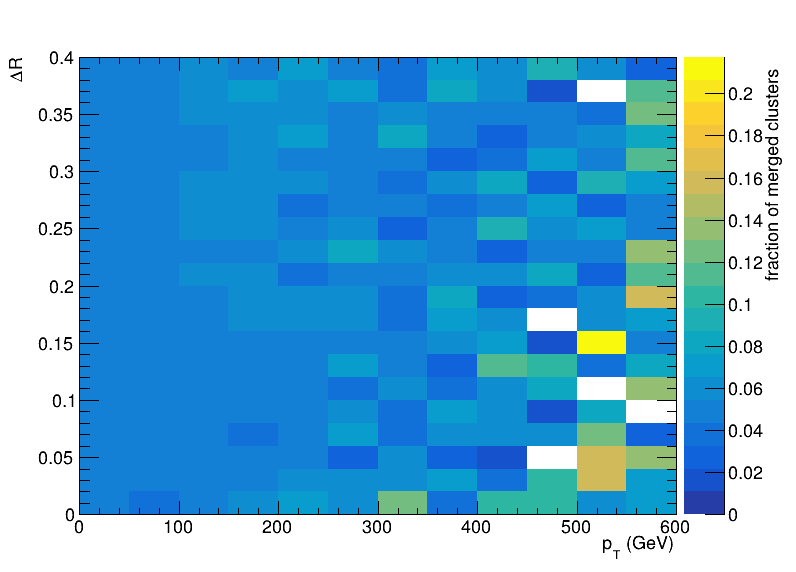

In [6]:
ROOT.gStyle.SetOptStat(0)
#ROOT.gStyle.SetPadRightMargin(0.1)
#ROOT.gROOT.ForceStyle()

c2=ROOT.TCanvas("c2","The Canvas Title",800,600)
h2_fraction_merged=copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R)
h2_fraction_merged.GetZaxis().SetTitle("fraction of merged clusters")
c2.SetRightMargin(0.15)
h2_fraction_merged.GetZaxis().SetTitleOffset(1.1)
h2_fraction_merged.Divide(h2_Cluster_dR_vs_jetpt_FPixD3_R)
c2.cd()
h2_fraction_merged.GetXaxis().SetRangeUser(0,600)
h2_fraction_merged.SetMinimum(0)
#h2_fraction_merged.SetMaximum(0.7)
h2_fraction_merged.Draw("colz")
#c2.SetLogz(0)
palette=h2_fraction_merged.GetListOfFunctions().FindObject("palette")
palette.SetX1NDC(0.86)
palette.SetX2NDC(0.91)
palette.SetY1NDC(0.1)
palette.SetY2NDC(0.9)
c2.Modified()
c2.Update()
c2.Draw()

#c2.SaveAs("D32D.png")

In [7]:
pTbins = array('d', [0, 50, 100, 150, 200, 300, 400, 500])

In [8]:
h1_Cluster_jetpt_FPixD3_R=[]
h1_Cluster_jetpt_FPixD3_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_R.ProjectionX("_px",1,1)))
h1_Cluster_jetpt_FPixD3_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_R.ProjectionX("_px",2,2)))
h1_Cluster_jetpt_FPixD3_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_R.ProjectionX("_px",5,6)))
h1_Cluster_jetpt_FPixD3_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_R.ProjectionX("_px",10,11)))
h1_Cluster_jetpt_FPixD3_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_R.ProjectionX("_px",16,20)))
#h1_Cluster_jetpt_FPixD3_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_R.ProjectionX("_px",31,40)))

h1_Cluster_jetpt_FPixD3_vr=[]
for h in h1_Cluster_jetpt_FPixD3_R:
    h1_Cluster_jetpt_FPixD3_vr.append(h.Rebin(len(pTbins)-1, "_px_vr", pTbins))

#c2.cd()
#h1_Cluster_jetpt_BPixL1_R[0].Draw()
#c2.Draw()

In [9]:
h1_Cluster_jetpt_FPixD3_merged_R=[]
h1_Cluster_jetpt_FPixD3_merged_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.ProjectionX("_px",1,1)))
h1_Cluster_jetpt_FPixD3_merged_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.ProjectionX("_px",2,2)))
h1_Cluster_jetpt_FPixD3_merged_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.ProjectionX("_px",5,6)))
h1_Cluster_jetpt_FPixD3_merged_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.ProjectionX("_px",10,11)))
h1_Cluster_jetpt_FPixD3_merged_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.ProjectionX("_px",16,20)))
#h1_Cluster_jetpt_FPixD3_merged_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.ProjectionX("_px",31,40)))

h1_Cluster_jetpt_FPixD3_merged_vr=[]
for h in h1_Cluster_jetpt_FPixD3_merged_R:
    h1_Cluster_jetpt_FPixD3_merged_vr.append(h.Rebin(len(pTbins)-1, "_px_vr", pTbins))


#c2.cd()
#h1_Cluster_jetpt_BPixL1_merged_R[0].Draw()
#c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


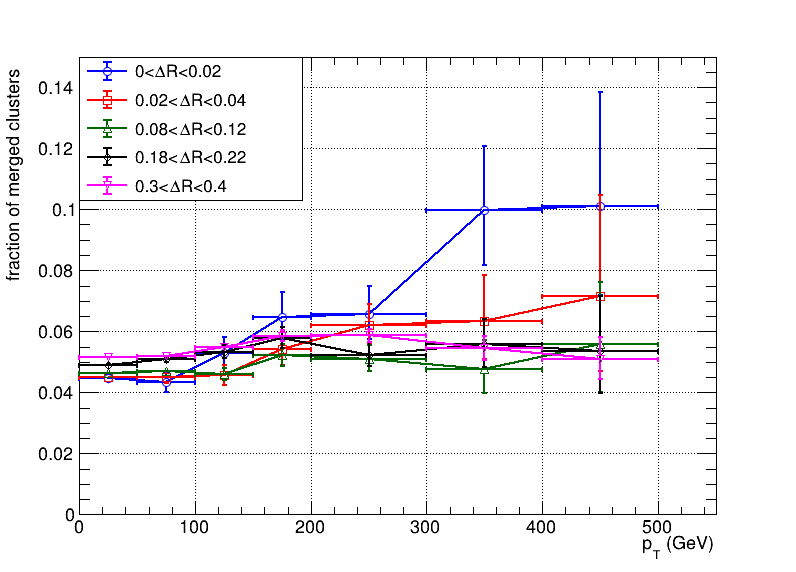

In [10]:
gr_fraction_merged=[]

bkg=ROOT.TH2F("bkg",";p_{T} (GeV);fraction of merged clusters", 100,0,550, 100,0,0.15)
gr_fraction_merged.append(ROOT.TGraphAsymmErrors(h1_Cluster_jetpt_FPixD3_merged_vr[0],h1_Cluster_jetpt_FPixD3_vr[0],"CP"))
gr_fraction_merged.append(ROOT.TGraphAsymmErrors(h1_Cluster_jetpt_FPixD3_merged_vr[1],h1_Cluster_jetpt_FPixD3_vr[1],"CP"))
gr_fraction_merged.append(ROOT.TGraphAsymmErrors(h1_Cluster_jetpt_FPixD3_merged_vr[2],h1_Cluster_jetpt_FPixD3_vr[2],"CP"))
gr_fraction_merged.append(ROOT.TGraphAsymmErrors(h1_Cluster_jetpt_FPixD3_merged_vr[3],h1_Cluster_jetpt_FPixD3_vr[3],"CP"))
gr_fraction_merged.append(ROOT.TGraphAsymmErrors(h1_Cluster_jetpt_FPixD3_merged_vr[4],h1_Cluster_jetpt_FPixD3_vr[4],"CP"))
#gr_fraction_merged.append(ROOT.TGraphAsymmErrors(h1_Cluster_jetpt_FPixD3_merged_vr[5],h1_Cluster_jetpt_FPixD3_vr[5],"CP"))

gr_fraction_merged[0].SetLineColor(ROOT.kBlue)
gr_fraction_merged[1].SetLineColor(ROOT.kRed)
gr_fraction_merged[2].SetLineColor(ROOT.kGreen+3)
gr_fraction_merged[3].SetLineColor(ROOT.kBlack )
gr_fraction_merged[4].SetLineColor(6)
#gr_fraction_merged[5].SetLineColor(ROOT.kOrange+2)


#gr_fraction_merged[0].SetLineStyle(1)
#gr_fraction_merged[1].SetLineStyle(2)
#gr_fraction_merged[2].SetLineStyle(3)
#gr_fraction_merged[3].SetLineStyle(4)
#gr_fraction_merged[4].SetLineStyle(9)
#gr_fraction_merged[5].SetLineStyle(10)

gr_fraction_merged[0].SetMarkerStyle(24)
gr_fraction_merged[1].SetMarkerStyle(25)
gr_fraction_merged[2].SetMarkerStyle(26)
gr_fraction_merged[3].SetMarkerStyle(35)
gr_fraction_merged[4].SetMarkerStyle(32)
#gr_fraction_merged[5].SetMarkerStyle(46)

gr_fraction_merged[0].SetMarkerColor(ROOT.kBlue)
gr_fraction_merged[1].SetMarkerColor(ROOT.kRed)
gr_fraction_merged[2].SetMarkerColor(ROOT.kGreen+3)
gr_fraction_merged[3].SetMarkerColor(ROOT.kBlack )
gr_fraction_merged[4].SetMarkerColor(6)
#gr_fraction_merged[5].SetMarkerColor(ROOT.kOrange+2)


gr_fraction_merged[0].SetLineWidth(2)
gr_fraction_merged[1].SetLineWidth(2)
gr_fraction_merged[2].SetLineWidth(2)
gr_fraction_merged[3].SetLineWidth(2)
gr_fraction_merged[4].SetLineWidth(2)
#gr_fraction_merged[5].SetLineWidth(2)


c2=ROOT.TCanvas("c2","The Canvas Title",800,600)
c2.SetGrid()
c2.cd()
bkg.Draw()
gr_fraction_merged[0].Draw("LP")
gr_fraction_merged[1].Draw("LP")
gr_fraction_merged[2].Draw("LP")
gr_fraction_merged[3].Draw("LP")
gr_fraction_merged[4].Draw("LP")
#gr_fraction_merged[5].Draw("LP")
c2.Draw()

leg=ROOT.TLegend(0.1,0.65,0.38,0.9)
leg.AddEntry(gr_fraction_merged[0],"0<#DeltaR<0.02","lep")
leg.AddEntry(gr_fraction_merged[1],"0.02<#DeltaR<0.04","lep")
leg.AddEntry(gr_fraction_merged[2],"0.08<#DeltaR<0.12","lep")
leg.AddEntry(gr_fraction_merged[3],"0.18<#DeltaR<0.22","lep")
leg.AddEntry(gr_fraction_merged[4],"0.3<#DeltaR<0.4","lep")
leg.Draw()

#c2.SaveAs("D3p.png")

In [11]:
dRbins = array('d', [0, 0.06, 0.12, 0.2, 0.3, 0.4])

In [12]:
h1_Cluster_dR_FPixD3_R=[]
h1_Cluster_dR_FPixD3_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_R.ProjectionY("_py",1,1)))
h1_Cluster_dR_FPixD3_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_R.ProjectionY("_py",2,2)))
h1_Cluster_dR_FPixD3_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_R.ProjectionY("_py",5,5)))
h1_Cluster_dR_FPixD3_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_R.ProjectionY("_py",7,7)))
h1_Cluster_dR_FPixD3_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_R.ProjectionY("_py",10,10)))

h1_Cluster_dR_FPixD3_vr=[]
for h in h1_Cluster_dR_FPixD3_R:
    h1_Cluster_dR_FPixD3_vr.append(h.Rebin(len(dRbins)-1, "_py_vr", dRbins))
#c2.cd()
#h1_Cluster_jetpt_BPixL1_merged_R[0].Draw()
#c2.Draw()

In [13]:
h1_Cluster_dR_FPixD3_merged_R=[]
h1_Cluster_dR_FPixD3_merged_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.ProjectionY("_py",1,1)))
h1_Cluster_dR_FPixD3_merged_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.ProjectionY("_py",2,2)))
h1_Cluster_dR_FPixD3_merged_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.ProjectionY("_py",5,5)))
h1_Cluster_dR_FPixD3_merged_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.ProjectionY("_py",7,7)))
h1_Cluster_dR_FPixD3_merged_R.append(copy.deepcopy(h2_Cluster_dR_vs_jetpt_FPixD3_merged_R.ProjectionY("_py",10,10)))

h1_Cluster_dR_FPixD3_merged_vr=[]
for h in h1_Cluster_dR_FPixD3_merged_R:
    h1_Cluster_dR_FPixD3_merged_vr.append(h.Rebin(len(dRbins)-1, "_py_vr", dRbins))
#c2.cd()
#h1_Cluster_jetpt_BPixL1_merged_R[0].Draw()
#c2.Draw()

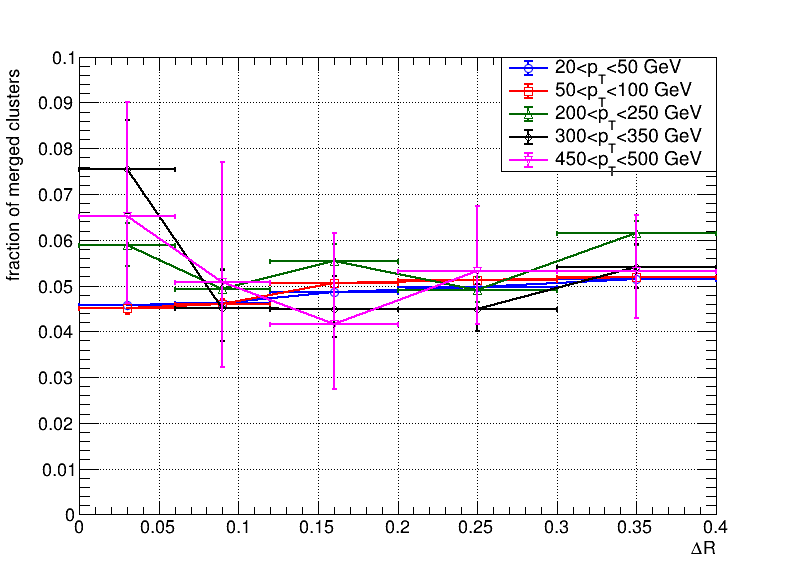

In [14]:
gr_fraction_merged=[]
bkg2=ROOT.TH2F("bkg2",";#DeltaR;fraction of merged clusters", 100,0,0.4, 100,0,0.1)
gr_fraction_merged.append(copy.deepcopy(ROOT.TGraphAsymmErrors(h1_Cluster_dR_FPixD3_merged_vr[0],h1_Cluster_dR_FPixD3_vr[0],"CP")))
gr_fraction_merged.append(copy.deepcopy(ROOT.TGraphAsymmErrors(h1_Cluster_dR_FPixD3_merged_vr[1],h1_Cluster_dR_FPixD3_vr[1],"CP")))
gr_fraction_merged.append(copy.deepcopy(ROOT.TGraphAsymmErrors(h1_Cluster_dR_FPixD3_merged_vr[2],h1_Cluster_dR_FPixD3_vr[2],"CP")))
gr_fraction_merged.append(copy.deepcopy(ROOT.TGraphAsymmErrors(h1_Cluster_dR_FPixD3_merged_vr[3],h1_Cluster_dR_FPixD3_vr[3],"CP")))
gr_fraction_merged.append(copy.deepcopy(ROOT.TGraphAsymmErrors(h1_Cluster_dR_FPixD3_merged_vr[4],h1_Cluster_dR_FPixD3_vr[4],"CP")))

gr_fraction_merged[0].SetLineColor(ROOT.kBlue)
gr_fraction_merged[1].SetLineColor(ROOT.kRed)
gr_fraction_merged[2].SetLineColor(ROOT.kGreen+3)
gr_fraction_merged[3].SetLineColor(ROOT.kBlack )
gr_fraction_merged[4].SetLineColor(6)

#gr_fraction_merged[0].SetLineStyle(1)
#gr_fraction_merged[1].SetLineStyle(2)
#gr_fraction_merged[2].SetLineStyle(3)
#gr_fraction_merged[3].SetLineStyle(4)
#gr_fraction_merged[4].SetLineStyle(9)


gr_fraction_merged[0].SetMarkerStyle(24)
gr_fraction_merged[1].SetMarkerStyle(25)
gr_fraction_merged[2].SetMarkerStyle(26)
gr_fraction_merged[3].SetMarkerStyle(35)
gr_fraction_merged[4].SetMarkerStyle(32)


gr_fraction_merged[0].SetMarkerColor(ROOT.kBlue)
gr_fraction_merged[1].SetMarkerColor(ROOT.kRed)
gr_fraction_merged[2].SetMarkerColor(ROOT.kGreen+3)
gr_fraction_merged[3].SetMarkerColor(ROOT.kBlack )
gr_fraction_merged[4].SetMarkerColor(6)


gr_fraction_merged[0].SetLineWidth(2)
gr_fraction_merged[1].SetLineWidth(2)
gr_fraction_merged[2].SetLineWidth(2)
gr_fraction_merged[3].SetLineWidth(2)
gr_fraction_merged[4].SetLineWidth(2)

c2.cd()
bkg2.Draw()
gr_fraction_merged[0].Draw("LP")
gr_fraction_merged[1].Draw("LP")
gr_fraction_merged[2].Draw("LP")
gr_fraction_merged[3].Draw("LP")
gr_fraction_merged[4].Draw("LP")
c2.Draw()

leg=ROOT.TLegend(0.63,0.70,0.9,0.9)
leg.AddEntry(gr_fraction_merged[0],"20<p_{T}<50 GeV","lep")
leg.AddEntry(gr_fraction_merged[1],"50<p_{T}<100 GeV","lep")
leg.AddEntry(gr_fraction_merged[2],"200<p_{T}<250 GeV","lep")
leg.AddEntry(gr_fraction_merged[3],"300<p_{T}<350 GeV","lep")
leg.AddEntry(gr_fraction_merged[4],"450<p_{T}<500 GeV","lep")
leg.Draw()

#c2.SaveAs("D3r.png")